<a href="https://colab.research.google.com/github/diyamanapetty/Text-Summarizer/blob/main/Text_Summarization_System_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy, en_core_web_sm
from collections import Counter
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [ ]:
sentence_to_be_ranked = ('Financially good conference situations.')
text_document_snippet = ('There is a developer beautiful and great conference happening on 21 July 2019 in London. The conference is in area of biological sciences.')

In [ ]:
doc = nlp(text_document_snippet)
sent = nlp(sentence_to_be_ranked)

In [ ]:
def getMainNounChuck(inputSentence):
    lenChunk = 0
    prevLen = -1
    mainChunk = ""
    for chunk in inputSentence.noun_chunks:
        lenChunk = len(chunk)
        print(chunk)
        print(lenChunk)
        if prevLen < lenChunk:
            mainChunk = chunk
            prevLen = lenChunk
    print("Main chunk is: ", mainChunk)
    return mainChunk

In [ ]:
def getSentimentScore(doc):
    print("Sentiment is ", doc.sentiment * 10)
    return doc.sentiment * 10

In [ ]:
def getsentiment2(sent):
    from textblob import TextBlob
    sentimentObject = TextBlob(sent.text) # Change here: Access the text content using sent.text
    sentimentObject = sentimentObject.sentiment
    print("Sentiment", sentimentObject.polarity * 10)
    return sentimentObject.polarity * 10

In [ ]:
def getSimilarity(sentence1, doc1):
    return doc1.similarity(sentence1)

In [ ]:
def getPOSCOUNT(inputText, inputPOSTag):
    nlp = en_core_web_sm.load()
    countPOS = 0
    doc = nlp(inputText)
    for token in doc:
        countPOS += 1
        dictonaryInputText = (Counter(([token.pos_ for token in doc]))) #Count POS tags for the entire doc
        print(dictonaryInputText)
    return dictonaryInputText[inputPOSTag]/(countPOS+1) * 100 #Access initialized countPOS

In [ ]:
print(getMainNounChuck(sent))
print("the similarity between sentences is", getSimilarity(nlp(sentence_to_be_ranked), getMainNounChuck(doc)))
getSentimentScore(sent)
print("Noun count", getPOSCOUNT(text_document_snippet, "NOUN"))
print("Verb count", getPOSCOUNT(text_document_snippet, "VERB"))
print("Adj count", getPOSCOUNT(text_document_snippet, "ADJ"))


Financially good conference situations
4
Main chunk is:  Financially good conference situations
Financially good conference situations
a developer beautiful and great conference
6
21 July
2
London
1
The conference
2
area
1
biological sciences
2
Main chunk is:  a developer beautiful and great conference
the similarity between sentences is 0.2777867913246155
Sentiment is  0.0


<ipython-input-12-f1a6945d27b3>:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return doc1.similarity(sentence1)


Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'P

In [ ]:
!pip install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
similarity_document = ctrl.Antecedent(np.arange(0, 1.25, .1), 'similarity')
sentiment_score = ctrl.Antecedent(np.arange(0, 1.25, .1), 'sentiment_score')
nounCount = ctrl.Antecedent(np.arange(0, 110, 10), 'nounCount')
verbCount = ctrl.Antecedent(np.arange(0, 110, 10), 'verbCount')
adjCount = ctrl.Antecedent(np.arange(0, 110, 10), 'adjCount')

In [ ]:
rank = ctrl.Consequent(np.arange(0, 24, 1), 'rank')

In [ ]:
similarity_document['low'] = fuzz.trimf(similarity_document.universe, [0, 0.3, 0.5])
similarity_document['average'] = fuzz.trimf(similarity_document.universe, [0.3, 0.7, 1])
similarity_document['high'] = fuzz.trimf(similarity_document.universe, [0.7, 1, 1.25])

sentiment_score['low'] = fuzz.trimf(sentiment_score.universe, [0, 0.3, 0.5])
sentiment_score['average'] = fuzz.trimf(sentiment_score.universe, [0.3, 0.7, 1])
sentiment_score['high'] = fuzz.trimf(sentiment_score.universe, [0.7, 1, 1.25])

nounCount['low'] = fuzz.trimf(nounCount.universe, [0, 30, 50])
nounCount['average'] = fuzz.trimf(nounCount.universe, [30, 70, 100])
nounCount['high'] = fuzz.trimf(nounCount.universe, [70, 100, 110])

verbCount['low'] = fuzz.trimf(verbCount.universe, [0, 30, 50])
verbCount['average'] = fuzz.trimf(verbCount.universe, [30, 50, 70])
verbCount['high'] = fuzz.trimf(verbCount.universe, [50, 70, 110])

rank['low'] = fuzz.trimf(rank.universe, [0, 0, 10])
rank['average'] = fuzz.trimf(rank.universe, [10, 12, 24])
rank['high'] = fuzz.trapmf(rank.universe, [12, 18, 24, 24])

In [ ]:
rule1 = ctrl.Rule(similarity_document['low'] | sentiment_score['low'], rank['low'])
rule2 = ctrl.Rule(sentiment_score['average'], rank['average'])
rule3 = ctrl.Rule(sentiment_score['average'] | similarity_document['average'], rank['average'])
rule10 = ctrl.Rule(similarity_document['high'] & nounCount["high"] & sentiment_score['high'] & verbCount["high"], rank['high'])

In [ ]:
rankFIS = ctrl.ControlSystem([rule1, rule2, rule3, rule10]) # Removed undefined rules: rule4, rule5, rule6, rule7, rule8, rule9
rankFIS = ctrl.ControlSystemSimulation(rankFIS)

In [ ]:
rankFIS = ctrl.ControlSystem([rule1, rule2, rule3, rule10])
rankFIS = ctrl.ControlSystemSimulation(rankFIS)

rankFIS.input['similarity'] = getSimilarity(doc, sent)
rankFIS.input['sentiment_score'] = getsentiment2(sent)
rankFIS.input['nounCount'] = getPOSCOUNT(text_document_snippet, "NOUN")
rankFIS.input['verbCount'] = getPOSCOUNT(text_document_snippet, "VERB")

rankFIS.compute()

print(rankFIS.output['rank'])

<ipython-input-12-f1a6945d27b3>:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return doc1.similarity(sentence1)


Sentiment 7.0
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 'PUNCT': 2, 'PRON': 1, 'CCONJ': 1, 'AUX': 1})
Counter({'NOUN': 5, 'ADP': 4, 'ADJ': 3, 'VERB': 2, 'DET': 2, 'NUM': 2, 'PROPN': 2, 

the answer is
10.74034413393369


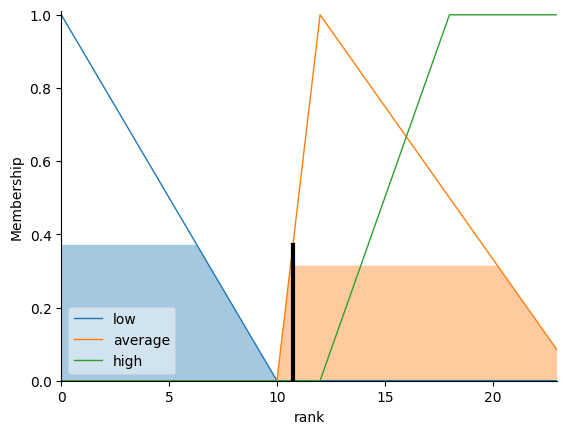

In [ ]:
rankFIS.compute()
print("the answer is")
print(rankFIS.output['rank'])
rank.view(sim=rankFIS)